In [1]:
import pandas as pd
import numpy as np
# !pip install pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_spss('../data/CCAM SPSS Data 2008-2018.sav')

## Create Target Column

In [3]:
df['target'] = [-1 if val == 'No' else 1 if val == 'Yes'
                else 0 for val in df.happening]

In [4]:
df.happening.value_counts(normalize=True)

Yes           0.665373
Don't know    0.170325
No            0.161135
Refused       0.003167
Name: happening, dtype: float64

In [5]:
# drop Refused
df = df[df.happening != "Refused"]

## EDA

In [6]:
def my_graph(variable, ordinals):
    fig, ax = plt.subplots(1, 2, figsize=(20,7))

    # bar graph with ordinals on the x axis
    # and frequency on y axis
    ax[0].bar(df[variable].value_counts(normalize=True).index,
              height = df[variable].value_counts(normalize=True))
    
    # label each bar
    ax[0].bar_label(ax[0].containers[0],
                    fmt="%.3f",
                   padding = 3)

    # fluff
    ax[0].set_xticks(range(int(df[variable].min()), 
                        int(df[variable].max()) + 1))
    ax[0].set_xticklabels(ordinals, rotation = 45, ha='right')


    ax[0].set_ylabel('% of Responses')

    ax[0].set_title(variable+' Distribution', loc='left', pad=10,
                 fontsize=16, color='maroon')


    # bar graph with ordinals on the x axis
    # and average target value on y axis
    ax[1].bar(df.groupby(variable).count().index,
              height = df.groupby(variable).mean().target,
              color = 'rebeccapurple')

    # label each bar
    ax[1].bar_label(ax[1].containers[0],
                    fmt="%.3f",
                   padding = 3)

    # fluff
    ax[1].set_xticks(range(int(df[variable].min()), 
                        int(df[variable].max()) + 1))
    ax[1].set_xticklabels(ordinals, rotation = 45, ha='right')


    ax[1].set_ylabel('Avg Target Val')

    ax[1].set_title(variable+' Avg Target Values', loc='left', pad=10,
                 fontsize=16, color='maroon')

#### `harm_dev_countries`
**How much do you think global warming will harm: People in developing countries**

In [7]:
list(df.harm_dev_countries.unique())

['A great deal',
 'Only a little',
 'Not at all',
 'A moderate amount',
 "Don't know",
 'Refused']

The response options.

In [8]:
# create list of response options
ordinals = ['Refused', 'Don\'t know', 'Not at all', 'Only a little', 'A moderate amount', 'A great deal']

# ordinal encode values
df.harm_dev_countries = df.harm_dev_countries.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

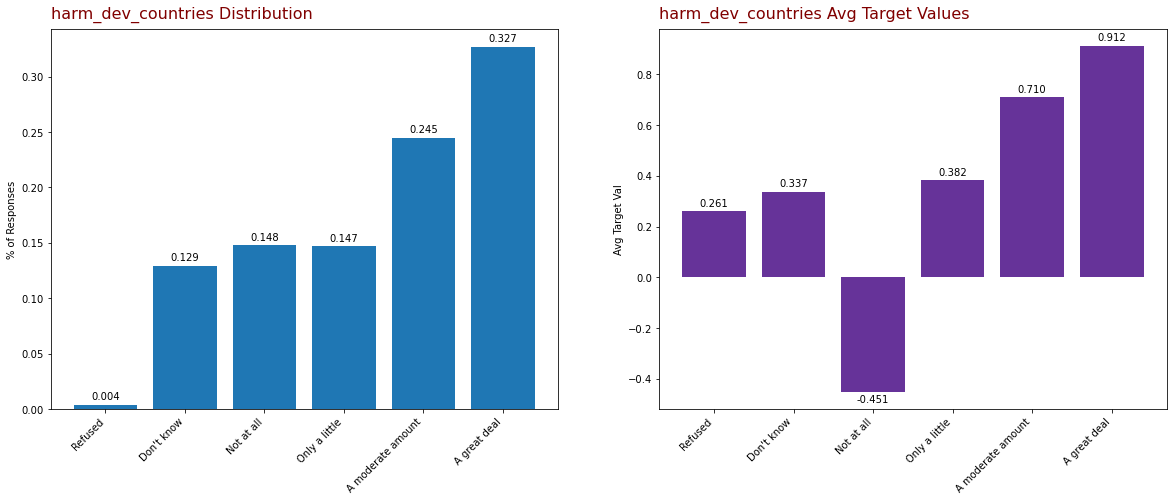

In [9]:
my_graph('harm_dev_countries', ordinals)

**Observation**
  *  A majority of respondents answered **A great deal** followed by **A moderate amount** indicating a majority of responses are geared toward agreeing that global warming will harm people in developing countries.
  *  Around 13.3% of respondents either did not know or refused to answer
  
  
  *  For respondents who provided an opinion, the average belief in global warming increases from **Not at all** to **A great deal** with **Not at all** being the only answering group that *doesn't* believe in global warming on average.
  *  For respondents who either did not know or refused, their average belief in global warming was closest to the **Only a little** group.

#### `harm_future_gen`
**How much do you think global warming will harm: Future generations of people**

In [10]:
list(df.harm_future_gen.unique())

['A great deal',
 'A moderate amount',
 'Not at all',
 "Don't know",
 'Only a little',
 'Refused']

The response options.

In [11]:
# create list of response options
ordinals = ['Refused', 'Don\'t know', 'Not at all', 'Only a little', 'A moderate amount', 'A great deal']

# ordinal encode values
df.harm_future_gen = df.harm_future_gen.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

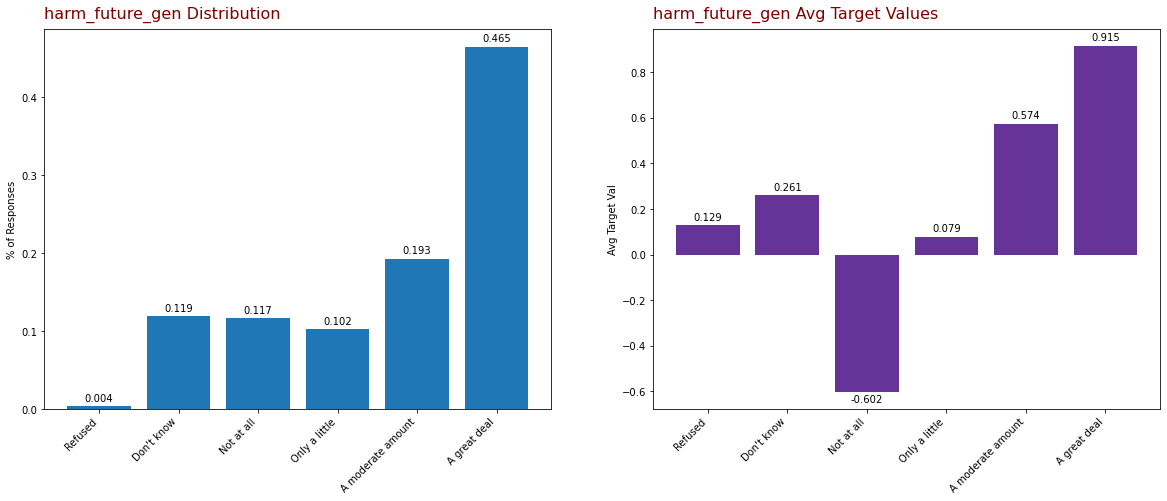

In [12]:
my_graph('harm_future_gen', ordinals)

**Observation**
  *  A majority of respondents answered **A great deal** followed by **A moderate amount** indicating a majority of responses are geared toward agreeing that global warming will harm future generations of people.
  *  Around 12.3% of respondents either did not know or refused to answer
  
  
  *  For respondents who provided an opinion, the average belief in global warming increases fronm **Not at all** to **A great deal** with **Not at all** being the only answering group that *doesn't* believe in global warming on average.
  *  Respondents who answered **Only a little** were neutral on average toward the existence of global warming.
  *  For respondents who either did not know or refused, their average belief in global warming was greater than to the **Only a little** group.

#### `harm_plants_animals`
**How much do you think global warming will harm: Plant and animal species**

In [13]:
list(df.harm_plants_animals.unique())

['A great deal',
 'A moderate amount',
 'Not at all',
 "Don't know",
 'Only a little',
 'Refused',
 nan]

The response options.

In [14]:
df.harm_plants_animals.isnull().sum() / df.shape[0]

0.0595211456701723

6% of respondents were not offered this question as it was not asked in Oct 2015.

In [15]:
# create list of response options
ordinals = ['Refused', 'Don\'t know', 'Not at all', 'Only a little', 'A moderate amount', 'A great deal']

# ordinal encode values
df.harm_plants_animals = df.harm_plants_animals.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

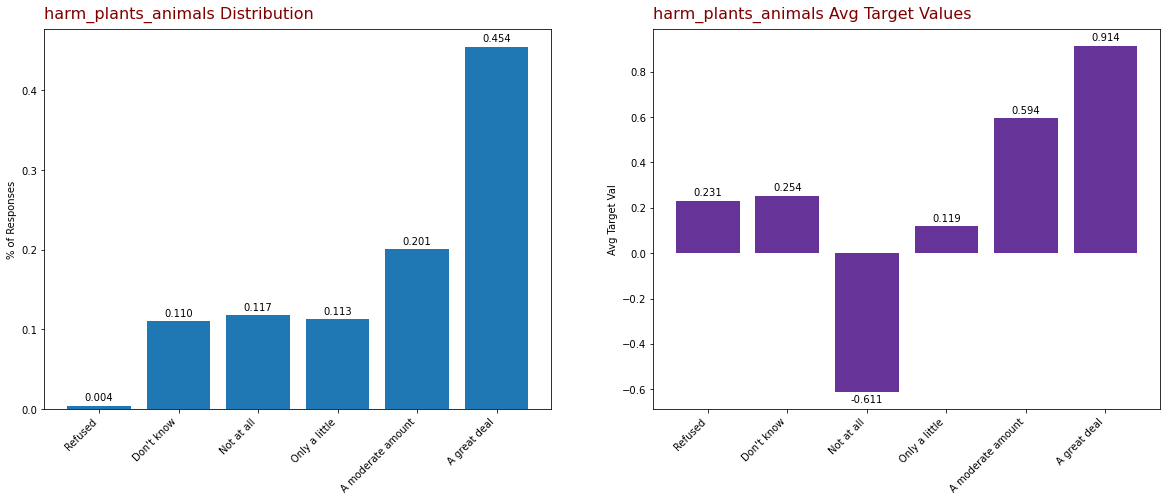

In [16]:
my_graph('harm_plants_animals', ordinals)

**Observation**
  *  A majority of respondents answered **A great deal** followed by **A moderate amount** indicating a majority of responses are geared toward agreeing that global warming will harm plant and animal species.
  *  Around 11.4% of respondents did not know or refused to answer
  
  
  *  For respondents who provided an opinion, the average belief in global warming increases fronm **Not at all** to **A great deal** with **Not at all** being the only answering group that *doesn't* believe in global warming on average.
  *  For respondents who either did not know or refused, their average belief in global warming were almost identical and were beyond that of the the **Only a little** group.

#### `when_harm_us`
**When do you think global warming will start to harm people in the United States?**

In [17]:
list(df.when_harm_US.unique())

['In 10 years',
 'In 50 years',
 'Never',
 'In 25 years',
 'In 100 years',
 'They are being harmed now',
 'Refused']

The response options.

In [18]:
# create list of response options
ordinals = ['Refused', '', 'Never', 'In 100 years', 'In 50 years', 'In 25 years'
            , 'In 10 years','They are being harmed now']

# ordinal encode values
df.when_harm_US = df.when_harm_US.replace(
                                {val: i for i,val in zip(range(-1,7),ordinals)})

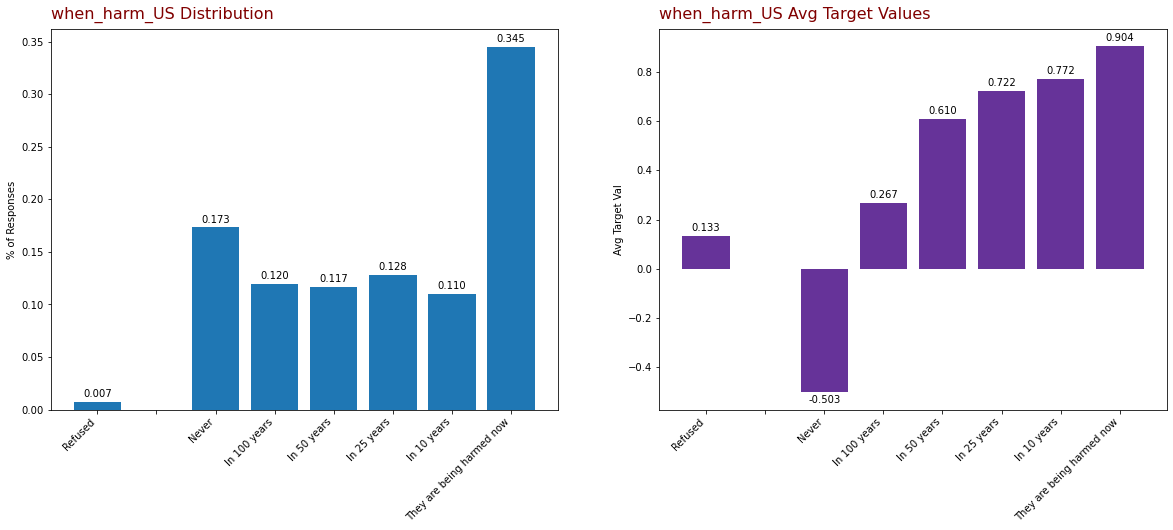

In [19]:
my_graph('when_harm_US', ordinals)

**Observation**
  *  A majority of respondents answered **They are being harmed now**. Including respondents for **In 10 years** and **In 25 years**, a majority of responses believe that global warming is or will be harming people in the United States within 25 years.
  *  Unlike previous questions, there was no **Don't Know** option.
  *  A very small amount of responses were **Refused** at around 0.7%
  
  
  *  Unsurprisingly, each person who had an answer that involved global warming being harmful to people in the United States now or in the future believed global warming was happening on average.
  *  Respondents who said **Never** were much more likely to not believe in global warming

#### `reg_CO2_pollutant`
**How much do you support or oppose the following policies?
Regulate carbon dioxide (the primary greenhouse gas) as a pollutant.**

In [20]:
list(df.reg_CO2_pollutant.unique())

['Strongly support',
 'Somewhat support',
 'Somewhat oppose',
 'Strongly oppose',
 'Refused',
 nan]

The response options.

In [21]:
df.reg_CO2_pollutant.isnull().sum()/df.shape[0]

0.04466323562318192

4.5% of respondents were not offered this question as it was not asked in May 2011

In [22]:
# create list of response options
ordinals = ['Refused', '', 'Strongly oppose', 'Somewhat oppose', 'Somewhat support'
            ,'Strongly support']

# ordinal encode values
df.reg_CO2_pollutant = df.reg_CO2_pollutant.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

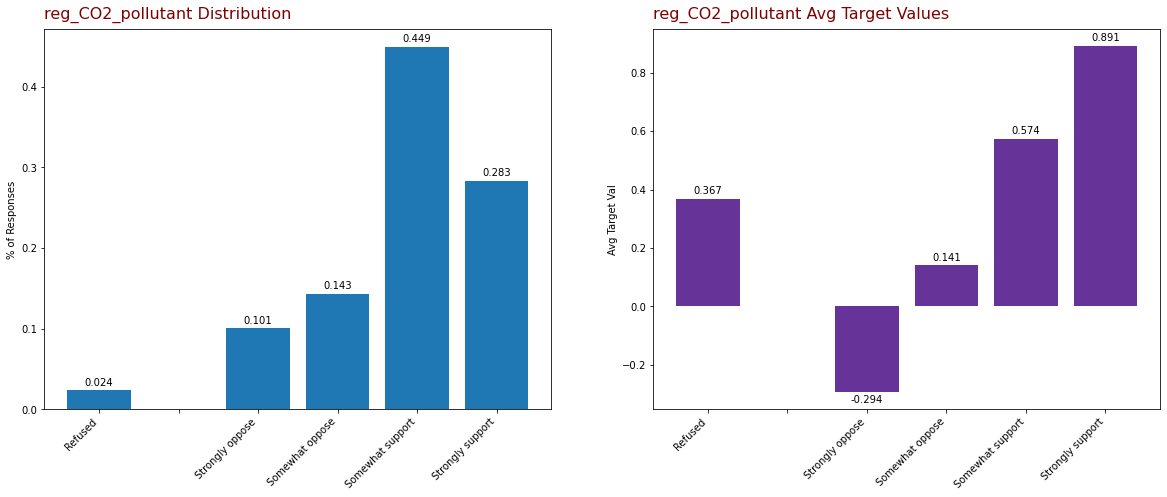

In [23]:
my_graph('reg_CO2_pollutant', ordinals)

**Observation**
  *  A majority of respondents answered **Somewhat Support**.
  *  **Somewhat oppose** outperformed **Strongly Oppose**, but not as greatly as with the gap between the two support options.
  *  There was no **Don't Know** option.
  *  2.4% of respondents refused to answer the question.
  
  
  *  For respondents who provided an opinion, the average belief in global warming increases from **Strongly oppose** to **Strongly support**.
  *  **Strongly oppose** was the only response that did not believe in global warming on average
  *  For respondents who refused, their average belief in global warming was between that of **Somewhat oppose** and **Somewhat support**.

#### `reg_utilities`
**How much do you support or oppose the following policies? Require electric utilities to produce at least 20% of their electricity from wind, solar, or other renewable energy sources, even if it costs the average household an extra $100 a year.**

In [24]:
list(df.reg_utilities .unique())

['Strongly support',
 'Somewhat support',
 'Strongly oppose',
 'Somewhat oppose',
 'Refused',
 nan]

The response options.

In [25]:
df.reg_utilities.isnull().sum() / df.shape[0]

0.22492727679570373

22.5% of respondents were not offered this question as it was not asked in Oct 2015, Mar and Nov 2016, and May 2017.

In [26]:
# create list of response options
ordinals = ['Refused', '', 'Strongly oppose', 'Somewhat oppose', 'Somewhat support'
            ,'Strongly support']

# ordinal encode values
df.reg_utilities = df.reg_utilities.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

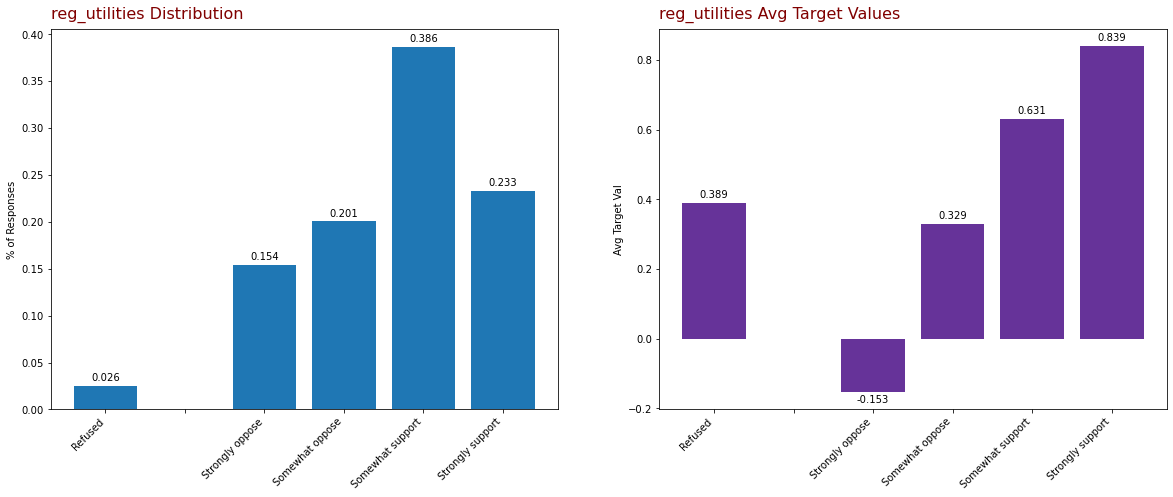

In [28]:
my_graph('reg_utilities', ordinals)

**Observation**
  *  A majority of respondents answered **Somewhat Support**.
  *  **Somewhat oppose** outperformed **Strongly Oppose**, but not as greatly as with the gap between the two support options.
  *  There was no **Don't Know** option.
  *  2.6% of respondents refused to answer the question.
  
  
  *  For respondents who provided an opinion, the average belief in global warming increases from **Strongly oppose** to **Strongly support**.
  *  **Strongly oppose** was the only response that did not believe in global warming on average
  *  For respondents who refused, their average belief in global warming was closest to **Somewhat oppose**.

#### `fund_research`
**How much do you support or oppose the following policies? Fund more research into renewable energy sources, such as solar and wind power.**

In [29]:
list(df.fund_research .unique())

['Strongly support',
 'Somewhat support',
 'Strongly oppose',
 'Somewhat oppose',
 'Refused']

The response options.

In [30]:
# create list of response options
ordinals = ['Refused', '', 'Strongly oppose', 'Somewhat oppose', 'Somewhat support'
            ,'Strongly support']

# ordinal encode values
df.fund_research = df.fund_research.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

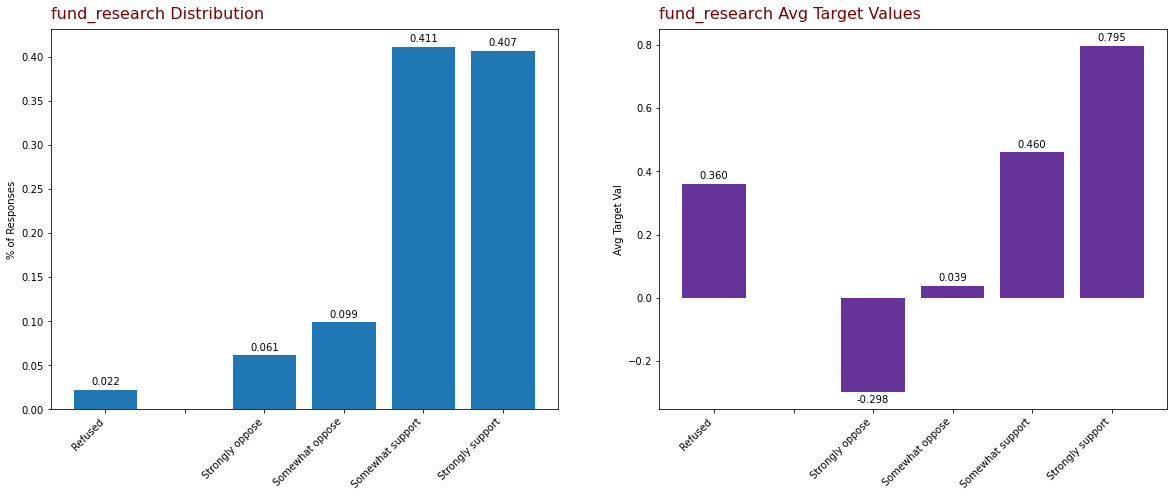

In [31]:
my_graph('fund_research', ordinals)

**Observation**
  *  A majority of respondents answered **Somewhat Support** followed closely by **Strongly support**. These answers make up over 82% of responses.
  *  There was no **Don't Know** option.
  *  2.2% of respondents refused to answer the question.
  
  
  *  For respondents who provided an opinion, the average belief in global warming increases from **Strongly oppose** to **Strongly support**.
  *  **Strongly oppose** was the only response that did not believe in global warming on average
  *  For respondents who refused, their average belief in global warming was closest to **Somewhat support**.

#### `reg_coal_emissions`
**How much do you support or oppose the following policy? Set strict carbon dioxide emission limits on existing coal-fired power plants to reduce global warming and improve public health. Power plants would have to reduce their emissions and/or invest in renewable energy and energy efficiency. The cost of electricity to consumers and companies would likely increase**

In [33]:
list(df.reg_coal_emissions.unique())

[nan,
 'Strongly oppose',
 'Strongly support',
 'Somewhat support',
 'Refused',
 'Somewhat oppose']

The response options.

In [34]:
df.reg_coal_emissions.isnull().sum() / df.shape[0]

0.4042962631461177

40.4% of respondents were not offered this question as it was not asked between 2008 and 2012, and Nov 2013.

Because of this high amount of missingness, drop the column.

In [35]:
df.drop('reg_coal_emissions', axis = 1, inplace=True)

#### `discuss_GW`
**How often do you discuss global warming with your family and friends?**

In [36]:
list(df.discuss_GW.unique())

['Occasionally', 'Rarely', 'Never', 'Often', 'Refused']

The response options.

In [37]:
# create list of response options
ordinals = ['Refused', '', 'Never', 'Rarely', 'Occasionally', 'Often']

# ordinal encode values
df.discuss_GW = df.discuss_GW.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

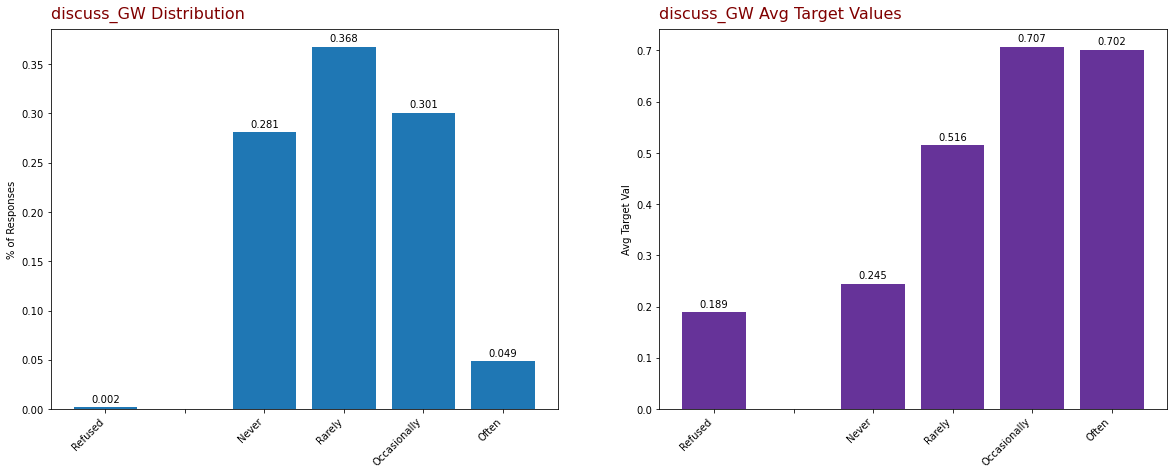

In [38]:
my_graph('discuss_GW', ordinals)

**Observation**
  *  A majority of respondents answered they **Rarely** discuss global warming with family and friends.
  *  In addition with **Rarely** and **Often**, most respondents discuss global warming.
  *  Compared to the 71.8% of respondents that do discuss global warming, 28.1% **Never** discuss it.
  *  There was no **Don't Know** option.
  *  0.2% of respondents refused to answer the question.
  
  
  *  Respondents who said **Occasionally** believe in global warming on average more than those who answered **Often**.
  *  There are no responses that do not believe in global warming on average, including **Never**

#### `hear_GW_media`
**About how often do you hear about global warming in the media (TV, movies, radio, newspapers/news websites, magazines, etc.)?**

In [39]:
list(df.hear_GW_media .unique())

[nan,
 'Once a year or less often',
 'Several times a year',
 'At least once a week',
 'Never',
 'At least once a month',
 'Not sure',
 'Refused']

The response options.

In [40]:
df.hear_GW_media.isnull().sum() / df.shape[0]

0.6080554933989707

60.8% of respondents were not offered this question as it was not asked between 2008 and 2014, and Nov 2016.

Because of this high amount of missingness, drop the column.

In [41]:
df.drop('hear_GW_media', axis = 1, inplace=True)

#### `gender`
**Are you Male or Female?**

In [43]:
# dummify gender to be 0 for male and 1 for female
df.gender = [int(val == 'Female') for val in df.gender]

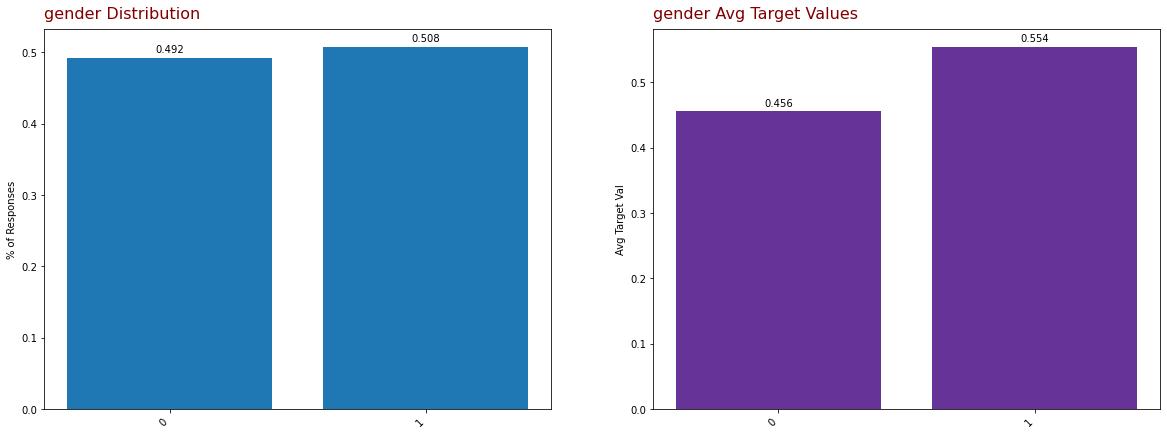

In [46]:
my_graph('gender', [0,1])

**Observation**
  *  The distribution of responses is very close to even with `female` representing a majority of responses at 50.8%
  
  
  *  There is about a 10 point change between the belief in climate change on average between `male` at 45.6% and `female` at 55.4%

#### `age`
**How old are you?**

In [54]:
df.age.describe()

count    22345.000000
mean        50.482166
std         16.805682
min         18.000000
25%         37.000000
50%         52.000000
75%         64.000000
max         97.000000
Name: age, dtype: float64

The range of responses was 18-97 meaning only responses from adults were recorded. The average age was 50 years old.

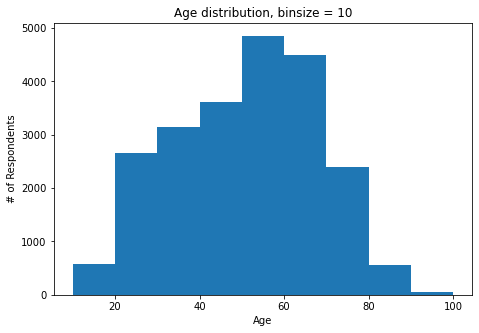

In [77]:
fig, ax = plt.subplots(1, 1, figsize = (7.5,5))
ax.hist(df.age,
        bins = np.arange(10,101,10))
ax.set_title('Age distribution, binsize = 10')
ax.set_ylabel('# of Respondents')
ax.set_xlabel('Age');

**Observation**
  *  The age distribution is centered around 50, which is also the mean and contains the median value 52.
  *  Right tailed with small amount of respondents in the 90-100 range.
  *  High number of young respondents also making it more skewed.

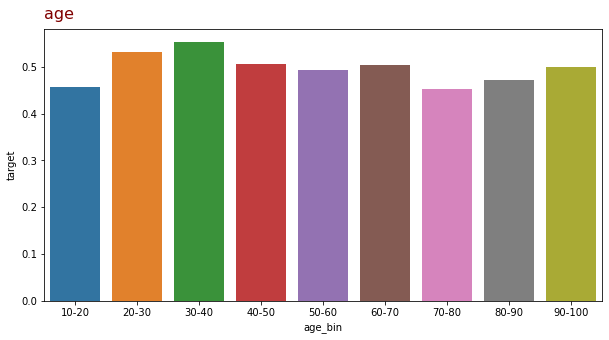

In [76]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

df['age_bin'] = pd.cut(df['age'], bins = range(10,101,10)
                       , labels=[f'{l}-{l+10}' for l in range(10,91,10)])\
                    .rename('age_bin')

sns.barplot(x = 'age_bin', y = 'target', data = df,
            estimator=np.mean, ci=None)
    
ax.set_title("age", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

In general, no age grouping has a belief value below 0.4 on average. The highest groups are `30-40` and `20-30` with the lowest group being `70-80`.

#### `age_category`
**Computed from `age` as a range**

In [78]:
list(df.age_category.unique())

['55+ years', '35-54 years', '18-34 years']

The computed ranges.

In [79]:
# dummify age_category and drop 18-34 years as an option
df = df.join(pd.get_dummies(df.age_category, prefix='age_category', 
                            drop_first=True))

# rename the new dummy columns to represent their value
df.rename(columns = {df.columns[-2]:'age_category_35_54', 
                     df.columns[-1]: 'age_category_55_plus'}, 
          inplace=True)

# confirm it works
df.columns[-2:]

Index(['age_category_35-54 years', 'age_category_55+ years'], dtype='object')

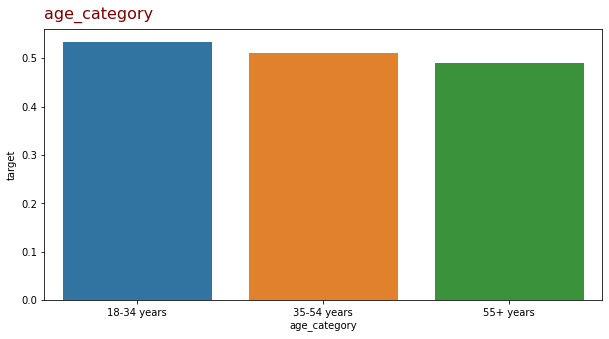

In [81]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

sns.barplot(x = 'age_category', y = 'target', data = df,
            estimator=np.mean, ci=None)
    
ax.set_title("age_category", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

**Observation**
  *  As age category increases, the average belief in global warming decreases
  *  All three categories are hovering around the 0.5 level for target value on average.